*   ***Name***        : Royan Sabila Rosyad W.
*   ***Username***    : royanrosyad85
*   ***Email***       : royan230603@gmail.com
*   ***University***  : Universitas Islam Negeri Syarif Hidayatullah Jakarta

In [ ]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 83.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 109.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 115.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 119.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.4 MB/s eta 0:00:00


In [3]:
import gdown
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.utils import resample

from tensorflow.keras.models import load_model
from tensorflow.keras.layers import TFSMLayer
import shutil, zipfile

Berikut dataset yang digunakan pada proyek ini

*   ***Dataset source***: https://grouplens.org/datasets/movielens/
*   ***Dataset name***: MovieLens Latest Small Datasets

*Dataset* yang dipakai dalam pembuatan model machine learning ini adalah "MovieLens Latest Small Dataset", yang dapat diunduh melalui situs Grouplens pada [link berikut](https://files.grouplens.org/datasets/movielens/ml-latest-small.zip). *Dataset* ini terdiri dari beberapa file, yaitu:

- `tag.csv`
- `rating.csv`
- `movies.csv`
- `links.csv`

Dari seluruh file tersebut, yang digunakan dalam proyek ini untuk membangun model dengan metode content based filtering dan collaborative filtering adalah `movies.csv` dan `ratings.csv`.

Berikut penjelasan lebih lanjut mengenai *dataset* yang digunakan:

Kolom-kolom pada file `movies.csv` meliputi:
- `movieId`: *Identifier* unik untuk setiap film
- `title`: Nama atau judul film
- `genres`: Genre utama dari masing-masing film

Sedangkan kolom-kolom pada file `ratings.csv` adalah:
- `userId`: *Identifier* unik untuk setiap pengguna yang memberikan rating
- `movieId`: *Identifier* film yang dinilai
- `rating`: Nilai rating yang diberikan oleh pengguna
- `timestamp`: Waktu saat data rating dicatat

In [4]:
import os
import requests

# 2. Download dataset dari URL
URL = "https://files.grouplens.org/datasets/movielens/ml-latest-small.zip"
response = requests.get(URL)
open("ml-latest-small.zip", "wb").write(response.content)

# 3. Ekstrak file zip
with zipfile.ZipFile("ml-latest-small.zip", 'r') as zip_ref:
    zip_ref.extractall(".")

# 4. Memastikan folder telah diekstrak
dataset_dir = "ml-latest-small"
print(f"Isi direktori {dataset_dir}:", os.listdir(dataset_dir))

# 5. Load movies.csv dan ratings.csv dengan pandas
movies_path = os.path.join(dataset_dir, "movies.csv")
ratings_path = os.path.join(dataset_dir, "ratings.csv")

movies_df = pd.read_csv(movies_path)
ratings_df = pd.read_csv(ratings_path)

Isi direktori ml-latest-small: ['movies.csv', 'README.txt', 'ratings.csv', 'tags.csv', 'links.csv']


### *Exploratory Data Analysis*
> ***Exploratory Data Analysis*** (EDA) merupakan proses awal dalam memahami data, yang bertujuan untuk menelaah karakteristik, menemukan pola, mendeteksi anomali, serta memastikan kebenaran asumsi-asumsi yang terdapat pada data.

Menampilkan jumlah baris, jumlah kolom, serta daftar nama kolom yang terdapat pada `movies_df`.

In [5]:
print('panjang baris dan kolom movies_df:', movies_df.shape)
print('movies_df kolom', movies_df.keys())

panjang baris dan kolom movies_df: (9742, 3)
movies_df kolom Index(['movieId', 'title', 'genres'], dtype='object')


Berdasarkan hasil *output* kode di atas, dapat disimpulkan bahwa `movies_df` memiliki 9742 baris dan 3 kolom.  
Tiga kolom yang terdapat pada `movies_df` adalah `movieId`, `title`, dan `genres`.


Menampilkan detail mengenai setiap kolom yang terdapat pada `movies_df`.

In [6]:
print('informasi kolom movies_df:')
movies_df.info()

informasi kolom movies_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


Dari hasil *output* kode sebelumnya, dapat diketahui hal-hal berikut:

*   Terdapat dua kolom bertipe objek, yaitu `title` dan `genres`, yang termasuk ke dalam fitur kategorikal (bukan numerik).
*   Satu kolom lainnya, yaitu `movieId`, memiliki tipe data numerik int64.

Menampilkan ringkasan statistik dari data `movies_df`.

In [7]:
print('informasi statistik movies_df:')
movies_df.describe()

informasi statistik movies_df:


,movieId
count,9742.000000
mean,42200.353623
std,52160.494854
min,1.000000
25%,3248.250000
50%,7300.000000
75%,76232.000000
max,193609.000000


Fungsi describe() menyajikan ringkasan statistik untuk setiap kolom, di antaranya:

*   **Count**  menunjukkan banyaknya data pada setiap kolom.
*   **Mean** merupakan rata-rata dari nilai-nilai pada kolom tersebut.
*   **Std** adalah nilai standar deviasi yang menggambarkan sebaran data.
*   **Min** menunjukkan nilai terkecil pada kolom.
*   **25%** adalah nilai kuartil pertama, yaitu batas bawah dari 25% data terendah.
*   **50%** merupakan kuartil kedua atau median, yaitu nilai tengah dari data.
*   **75%** adalah kuartil ketiga, batas atas dari 75% data terendah.
*   **Max** menunjukkan nilai terbesar pada kolom.

Melihat contoh data dari `movies_df` dengan mengambil 5 baris pertama.

In [8]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Dari *output* kode yang dihasilkan, dapat disimpulkan bahwa kolom `movieId` dan `title` tidak memerlukan penyesuaian lebih lanjut. Sebaliknya, kolom `genres` menampilkan beberapa genre per film, sehingga diperlukan langkah pemrosesan untuk mengisolasi genre utama dari masing-masing film.

Kolom `genres` memuat beberapa genre yang dipisahkan oleh tanda |, sehingga perlu dilakukan pemrosesan untuk mengekstrak hanya genre utama dengan cara melakukan split pada nilai kolom tersebut.

In [9]:
movies_df['genres'] = movies_df['genres'].str.split('|').str[0]

Kode di atas digunakan untuk mengekstrak genre utama dari setiap film, sehingga kolom genre hanya memuat satu genre saja dengan cara memisahkan *value* pada kolom tersebut.

Melihat kembali contoh data dari `movies_df` dengan mengambil 5 baris pertama.

In [10]:
movies_df.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure
1,2,Jumanji (1995),Adventure
2,3,Grumpier Old Men (1995),Comedy
3,4,Waiting to Exhale (1995),Comedy
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action
6,7,Sabrina (1995),Comedy
7,8,Tom and Huck (1995),Adventure
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action


Melihat jumlah data `movieId` yang unik yang ada di `movies_df`.


In [11]:
print('Num of unique movieId:', len(movies_df['movieId'].unique()))

Num of unique movieId: 9742


Kode di atas digunakan untuk memastikan bahwa setiap nilai pada kolom `movieId` di `movies_df` bersifat unik dan tidak ada duplikasi. Hasilnya menunjukkan terdapat 87585 nilai unik, yang jumlahnya sama dengan total data, sehingga dapat disimpulkan bahwa seluruh `movieId` pada `movies_df` memang unik.

Melihat jumlah data genre dari `movies_df` dan menampilkannya.


In [12]:
print('Num of unique genres:', len(movies_df['genres'].unique()))
list_of_genres = pd.DataFrame(movies_df['genres'].unique(), columns=['genres'])
list_of_genres

Num of unique genres: 19


,genres
0,Adventure
1,Comedy
2,Action
3,Drama
4,Crime
5,Children
6,Mystery
7,Animation
8,Documentary
9,Thriller


Melihat jumlah data dari setiap genre yang ada di kolom `genres` yang ada di `movies_df`.

In [13]:
movies_df['genres'].value_counts()

genres
Comedy                2779
Drama                 2226
Action                1828
Adventure              653
Crime                  537
Horror                 468
Documentary            386
Animation              298
Children               197
Thriller                84
Sci-Fi                  62
Mystery                 48
Fantasy                 42
Romance                 38
(no genres listed)      34
Musical                 23
Western                 23
Film-Noir               12
War                      4
Name: count, dtype: int64

Dari *output* kode diatas, dapat dilihat bahwa terdapat *outlier* pada `movies_df` yang dimana nantinya akan dihapus.

Mengambil panjang baris dan kolom serta nama-nama kolom yang ada di `ratings_df`.

In [14]:
print('panjang baris dan kolom ratings_df:', ratings_df.shape)
print('ratings_df kolom:', ratings_df.keys())

panjang baris dan kolom ratings_df: (100836, 4)
ratings_df kolom: Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')


Dari hasil *output* kode sebelumnya, dapat diketahui hal-hal berikut:

*   Data terdiri atas 100.836 baris dan 4 kolom.
*   Empat fitur yang tersedia adalah `userId`, `movieId`, `rating`, dan `timestamp`.

Informasi kolom yang terdapat di ratings_df

In [15]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


Dari *output* kode sebelumnya, dapat diketahui hal-hal berikut:

*   Tiga kolom numerik bertipe *int64* terdapat pada data, yaitu: `userId`, `movieId`, dan `timestamp`.
*   Satu kolom lainnya, yaitu `rating`, memiliki tipe data numerik *float64*.

In [ ]:
print('ratings_df statistic information')
ratings_df.describe()

rating_df statistic information


,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


Fungsi describe() menyajikan ringkasan statistik untuk setiap kolom dalam data, di antaranya:

*   **Count** menunjukkan banyaknya data pada setiap kolom.
*   **Mean** merupakan rata-rata dari nilai-nilai pada kolom tersebut.
*   **Std** adalah nilai standar deviasi yang menggambarkan sebaran data.
*   **Min** menunjukkan nilai terkecil pada kolom.
*   **25%** adalah nilai kuartil pertama, yaitu batas bawah dari 25% data terendah.
*   **50%** merupakan kuartil kedua atau median, yaitu nilai tengah dari data.
*   **75%** adalah kuartil ketiga, batas atas dari 75% data terendah.
*   **Max** menunjukkan nilai terbesar pada kolom.

In [17]:
ratings_df.head(10)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


Menampilkan total pengguna unik yang ada pada data ratings_df

In [ ]:
print('Num of unique userId:', len(ratings_df['userId'].unique()))

Num of unique userId: 610


Berdasarkan *output* kode diatas, terdapat sebanyak 610 data *user* yang unik pada `ratings_df`.

In [19]:
print('Num of unique movieId:', len(ratings_df['movieId'].unique()))

Num of unique movieId: 9724


Cek missing value pada movies_df

In [20]:
missing_value = movies_df.isnull().sum()
missing_value

movieId    0
title      0
genres     0
dtype: int64

Berdasarkan *output* kode diatas, tidak terdapat satupun data *null* pada `movies_df`.

Cek missing value pada ratings_df

In [21]:
missing_value = ratings_df.isnull().sum()
missing_value

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Berdasarkan *output* kode diatas, tidak terdapat satupun data *null* pada `ratings_df`.

### Cek Duplikat Data

In [22]:
print(movies_df.duplicated().any())
print(movies_df[movies_df.duplicated()])

False
Empty DataFrame
Columns: [movieId, title, genres]
Index: []


Tidak terdapat satupun data duplikat pada `movies_df`.

In [23]:
print(ratings_df.duplicated().any())
print(ratings_df[ratings_df.duplicated()])

False
Empty DataFrame
Columns: [userId, movieId, rating, timestamp]
Index: []


In [24]:
print(movies_df.isna().any().any())
print(movies_df[movies_df.isna().any(axis=1)])

False
Empty DataFrame
Columns: [movieId, title, genres]
Index: []


Berdasarkan *output* kode diatas, tidak terdapat satupun data NaN pada `movies_df`.

## *Data Visualization*

#### *Univariate Analysis*
> *Univariate analysis* adalah teknik analisis yang difokuskan pada satu variabel (*feature*) saja dalam satu waktu. Tujuan dari analisis ini adalah untuk memahami distribusi, karakteristik, dan pola yang ada pada variabel tersebut.

Mendefinisikan fungsi untuk menghitung total dan persentase data dari setiap kategori.

In [25]:
def CountAndPlot(df, feature):
  count = df[feature].value_counts()
  percent = 100*df[feature].value_counts(normalize=True)
  samples = pd.DataFrame({'Sample Count':count, 'Percentage':percent.round(1)})
  print(samples)
  count.plot(kind='bar', title=feature)

                    Sample Count  Percentage
genres                                      
Comedy                      2779        28.5
Drama                       2226        22.8
Action                      1828        18.8
Adventure                    653         6.7
Crime                        537         5.5
Horror                       468         4.8
Documentary                  386         4.0
Animation                    298         3.1
Children                     197         2.0
Thriller                      84         0.9
Sci-Fi                        62         0.6
Mystery                       48         0.5
Fantasy                       42         0.4
Romance                       38         0.4
(no genres listed)            34         0.3
Musical                       23         0.2
Western                       23         0.2
Film-Noir                     12         0.1
War                            4         0.0


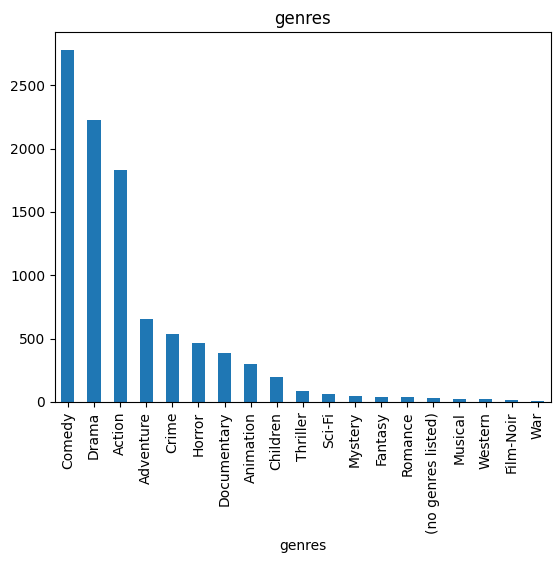

In [26]:
CountAndPlot(movies_df, 'genres')

Dari visualisasi grafik tersebut, terlihat bahwa genre `drama` memiliki jumlah terbanyak dalam dataset `movies_df`, diikuti oleh genre `comedy` dan `action` yang menempati posisi kedua dan ketiga.

        Sample Count  Percentage
rating                          
4.0            26818        26.6
3.0            20047        19.9
5.0            13211        13.1
3.5            13136        13.0
4.5             8551         8.5
2.0             7551         7.5
2.5             5550         5.5
1.0             2811         2.8
1.5             1791         1.8
0.5             1370         1.4


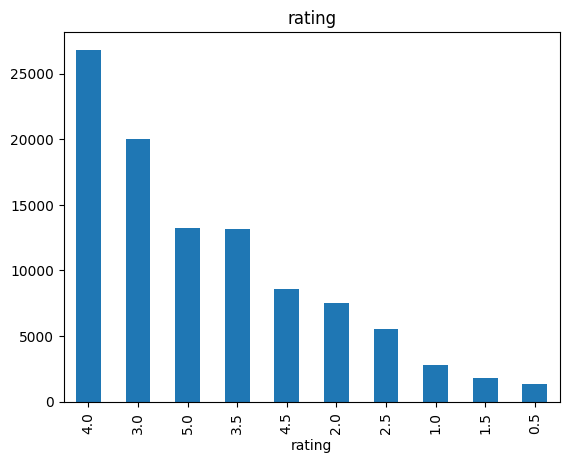

In [27]:
CountAndPlot(ratings_df, 'rating')

Berdasarkan grafik yang dihasilkan, dapat diamati bahwa mayoritas *user* cenderung memberikan rating `4.0` pada film yang mereka tonton. Hal ini menunjukkan adanya kecenderungan pengguna untuk memberikan penilaian yang cukup tinggi terhadap film, yang dapat mempengaruhi distribusi data rating secara keseluruhan. Pola ini penting untuk diperhatikan karena dapat berdampak pada proses pelatihan model rekomendasi, terutama dalam mengidentifikasi preferensi pengguna secara lebih akurat.

## Data Preparation

#### *Data Cleaning*

> **Penjelasan**: *Data cleaning* adalah tahap krusial dalam pengembangan sistem rekomendasi. Pada tahap ini, data yang tidak relevan, tidak lengkap, atau tidak konsisten diidentifikasi dan dibersihkan, sehingga dataset menjadi siap untuk dianalisis dan digunakan dalam proses pelatihan model.

##### *Removal Duplicates and NaN Data*

Tahap awal dalam proses *data cleaning* melibatkan penghapusan baris yang duplikat serta nilai kosong (*NaN*) yang dapat mempengaruhi akurasi dan kinerja model. Tindakan ini bertujuan untuk menjamin bahwa setiap data pada dataset bersifat unik dan konsisten.

Membersihkan `movies_df` dan `ratings_df` dari data yang duplikat dan data yang memiliki *value* `NaN`. Kemudian memasukkan hasil dari kedua proses tersebut ke `clean_movies_df` dan `clean_ratings_df`.

In [28]:
clean_movies_df = movies_df.drop_duplicates().dropna()
clean_ratings_df = ratings_df.drop_duplicates().dropna()

In [29]:
clean_movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure
1,2,Jumanji (1995),Adventure
2,3,Grumpier Old Men (1995),Comedy
3,4,Waiting to Exhale (1995),Comedy
4,5,Father of the Bride Part II (1995),Comedy


In [30]:
clean_ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


##### *Removal Irrelevant Columns*

> **Penjelasan**: Tahapan ini bertujuan untuk menghilangkan data yang tidak dibutuhkan dan tidak berkontribusi pada proyek.

> **Alasan**: Langkah ini dilakukan agar dataset hanya berisi data yang relevan, sehingga proses analisis menjadi lebih efektif. Selain itu, perlu dipastikan bahwa setiap `movieId` pada `ratings_df` juga terdapat di `movies_df`, agar data tetap konsisten saat diproses pada tahap berikutnya.

Berdasarkan hasil visualisasi pada tahap *data understanding*, ditemukan bahwa pada `movies_df` terdapat genre `(no genres listed)` yang sebaiknya dihapus karena tidak relevan untuk pengembangan model. Selain itu, kolom `timestamp` pada `ratings_df` juga tidak dibutuhkan dalam proses pengembangan model sehingga perlu dihilangkan.

Genre film '(no genres listed)' yang dianggap tidak relevan dihapus dari `clean_movies_df` untuk memastikan hanya data yang sesuai yang digunakan dalam analisis.

In [31]:
clean_movies_df = clean_movies_df[clean_movies_df['genres'] != '(no genres listed)']
clean_movies_df['genres'].value_counts()

genres
Comedy         2779
Drama          2226
Action         1828
Adventure       653
Crime           537
Horror          468
Documentary     386
Animation       298
Children        197
Thriller         84
Sci-Fi           62
Mystery          48
Fantasy          42
Romance          38
Musical          23
Western          23
Film-Noir        12
War               4
Name: count, dtype: int64

Selanjutnya, kolom `timestamp` pada `clean_ratings_df` dihapus karena tidak dibutuhkan dalam proses pengembangan model.

In [32]:
clean_ratings_df = clean_ratings_df.drop('timestamp', axis=1)
clean_ratings_df.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


Kemudian selanjutnya memastikan bahwa `movieId` yang ada di `ratings_df` terdaftar pada `movies_df` juga agar sesuai ketika data diproses pada tahap-tahap selanjutnya.

In [33]:
moviesIds = clean_ratings_df['movieId'].unique()
print('Total: ', len(moviesIds))
moviesIds

Total:  9724


array([     1,      3,      6, ..., 160836, 163937, 163981])

In [34]:
len(clean_ratings_df)

100836

In [35]:
clean_ratings_df = clean_ratings_df[clean_ratings_df['movieId'].isin(moviesIds)]
len(clean_ratings_df)

100836

##### *Handle Imbalance Data*

> **Penjelasan**: Memeriksa dan menghapus data untuk mengatasi masalah ketidakseimbangan

> **Alasan**: Proses ini diperlukan untuk membersihkan data dari data yang terlalu sedikit jumlahnya dan tidak seimbang terhadap jumlah data lainnya

In [ ]:
clean_movies_df = clean_movies_df[clean_movies_df['genres'] != 'War']
print('Jumlah Genre War:', len(clean_movies_df[clean_movies_df['genres'] == 'War']))
print()
print(clean_movies_df['genres'].value_counts())

Jumlah Genre IMAX: 0

genres
Comedy         2779
Drama          2226
Action         1828
Adventure       653
Crime           537
Horror          468
Documentary     386
Animation       298
Children        197
Thriller         84
Sci-Fi           62
Mystery          48
Fantasy          42
Romance          38
Musical          23
Western          23
Film-Noir        12
War               4
Name: count, dtype: int64


Kemudian melakukan *grouping* untuk setiap `moviesId` terhadap seluruh data *rating* yang ada.

In [37]:
grouped_ratings = clean_ratings_df.groupby('movieId')
grouped_ratings.groups

{1: [0, 516, 874, 1434, 1667, 1772, 2274, 3219, 4059, 4879, 4929, 5031, 5555, 6315, 6429, 6477, 6876, 7112, 7931, 8035, 9157, 9428, 9979, 10360, 11728, 11808, 12264, 12412, 12730, 13402, 13549, 14067, 14121, 14720, 15041, 15155, 15565, 16970, 17904, 18536, 18773, 19179, 19822, 19919, 20301, 20336, 20726, 21083, 21691, 21968, 22096, 22303, 22425, 22638, 22684, 23129, 23226, 23663, 23864, 24054, 24321, 24640, 24900, 25804, 25881, 26092, 27260, 27307, 27925, 28032, 28934, 29268, 29378, 29936, 30517, 30601, 30721, 30885, 31524, 32052, 32840, 33044, 33670, 33898, 34760, 34910, 35301, 35580, 36173, 36374, 37470, 37555, 38236, 38446, 38665, 39031, 39060, 39174, 39229, 40575, ...], 2: [560, 1026, 1773, 2275, 2977, 3220, 4060, 7422, 8791, 10361, 12731, 14122, 14721, 14817, 15566, 15942, 16971, 17905, 18349, 18831, 19229, 20337, 21084, 21969, 22219, 22426, 23227, 24322, 24901, 27308, 29379, 30886, 31525, 32259, 32590, 33045, 33735, 33899, 35581, 36375, 37945, 39230, 40979, 41732, 42115, 43958, 4

Proses *undersampling* dilakukan sehingga setiap `movies_id` hanya terhubung dengan paling banyak tiga `userId`.

In [38]:
target_ratings = 3

clean_ratings_df = pd.concat(
    [
        group.sample(n=target_ratings, random_state=42) if len(group) > target_ratings else
        resample(group, replace=True, n_samples=target_ratings, random_state=42)
        for _, group in grouped_ratings
    ]
)

clean_ratings_df

,userId,movieId,rating
90256,587,1,5.0
98666,608,1,2.5
58965,385,1,4.0
75200,475,2,4.5
12731,82,2,3.0
...,...,...,...
27259,184,193587,3.5
27259,184,193587,3.5
51362,331,193609,4.0
51362,331,193609,4.0


#### *Text Processing*

> **Penjelasan**: Tahapan ini bertujuan untuk menemukan serta memperbaiki atau menghapus data yang tidak valid, tidak seragam, maupun tidak sesuai dalam dataset.

> **Alasan**: Langkah ini penting agar seluruh data memiliki format yang seragam dan tidak terdapat perbedaan dalam penulisan atau struktur data.

In [ ]:
clean_movies_df['genres'] = clean_movies_df['genres'].replace({'Film-Noir': 'Filmnoir', 'Sci-Fi': 'Scifi'})
print('Filmnoir Genres Count : ', len(clean_movies_df[clean_movies_df['genres'] == 'Filmnoir']))
print('Scifi Genres Count : ', len(clean_movies_df[clean_movies_df['genres'] == 'Scifi']))

print()

print('Example movie with genre Filmnoir')
print(clean_movies_df[clean_movies_df['genres'] == 'Filmnoir'].head())

print()

print('Example movie with genre Scifi')
print(clean_movies_df[clean_movies_df['genres'] == 'Scifi'].head())

IMAX Genres Count :  12
IMAX Genres Count :  62

Example movie with genre Filmnoir
      movieId                       title    genres
279       320               Suture (1993)  Filmnoir
695       913  Maltese Falcon, The (1941)  Filmnoir
711       930            Notorious (1946)  Filmnoir
913      1212       Third Man, The (1949)  Filmnoir
1531     2066      Out of the Past (1947)  Filmnoir

Example movie with genre Scifi
      movieId                                  title genres
668       880       Island of Dr. Moreau, The (1996)  Scifi
1320     1779                          Sphere (1998)  Scifi
1719     2311  2010: The Year We Make Contact (1984)  Scifi
1902     2526                          Meteor (1979)  Scifi
2000     2661        It Came from Outer Space (1953)  Scifi


In [40]:
clean_movies_df.to_csv('clean_movies_df.csv', index=False)

#### *Data Transformation*

> **Penjelasan**: *Data transformation* merupakan tahapan mengonversi data mentah menjadi format yang lebih sesuai untuk keperluan analisis atau pelatihan model. Proses ini dapat mencakup berbagai metode, seperti normalisasi, standardisasi, encoding, dan scaling, agar data memiliki skala atau bentuk yang selaras dengan kebutuhan algoritma machine learning.

> **Alasan**: Transformasi data dilakukan untuk memastikan kualitas data meningkat sehingga model dapat belajar secara optimal, misalnya pada pengembangan model *sentiment analysis*.


In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [42]:
tfidf_matrix = tfidf.fit_transform(movies_df['genres'])
tfidf_matrix.shape

(9742, 23)

In [43]:
tfidf_matrix.todense()

matrix([[0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [44]:
df = pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tfidf.get_feature_names_out(),
    index=movies_df['movieId']
)
sampled_df = df.sample(df.shape[1], axis=1).sample(df.shape[0], axis=0)
sampled_df

,no,genres,drama,noir,western,documentary,action,animation,musical,adventure,...,war,comedy,crime,fi,thriller,fantasy,horror,children,romance,sci
movieId,,,,,,,,,,,,,,,,,,,,,
631,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
190183,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.707107,0.0,0.0,0.0,0.0,0.0,0.707107
7251,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
127114,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
152085,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5780,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
5254,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
71970,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000


#### *Calculating Cosine Similarity*

> **Penjelasan**: *Cosine similarity* merupakan teknik yang digunakan untuk menilai seberapa mirip dua vektor dalam ruang multidimensi dengan melihat sudut di antara keduanya. Skor cosine similarity berada pada rentang -1 hingga 1, di mana angka 1 menandakan kemiripan total, 0 berarti tidak ada kemiripan, dan -1 menunjukkan arah yang benar-benar berlawanan.

> **Alasan**: Tahapan ini penting dilakukan karena metode ini efektif dalam menilai tingkat kemiripan antar dokumen atau data yang akan dimanfaatkan dalam model.


In [45]:
from sklearn.metrics.pairwise import cosine_similarity

cosine = cosine_similarity(tfidf_matrix)
cosine

array([[1., 1., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 1.]])

In [46]:
cosine_df = pd.DataFrame(cosine, index=movies_df.title, columns=movies_df.title)
cosine_df.sample(5, axis=1).sample(10, axis=0)

title,"Diving Bell and the Butterfly, The (Scaphandre et le papillon, Le) (2007)",I Can't Think Straight (2007),Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone) (2001),Rage of Honor (1987),Citizen X (1995)
title,,,,,
Saved! (2004),0.0,0.0,0.0,0.0,0.0
Pontypool (2008),0.0,0.0,0.0,0.0,0.0
"Harder They Fall, The (1956)",1.0,1.0,0.0,0.0,0.0
"Andalusian Dog, An (Chien andalou, Un) (1929)",0.0,0.0,0.0,0.0,0.0
Suicide Club (Jisatsu saakuru) (2001),0.0,0.0,0.0,0.0,0.0
Fur: An Imaginary Portrait of Diane Arbus (2006),1.0,1.0,0.0,0.0,0.0
Before the Devil Knows You're Dead (2007),0.0,0.0,0.0,0.0,1.0
Remember Me (2010),1.0,1.0,0.0,0.0,0.0
Prince of Darkness (1987),0.0,0.0,0.0,0.0,0.0


#### *Data Encoding*

> **Penjelasan**: *Data encoding* merupakan langkah untuk mengonversi data ke dalam bentuk numerik.

> **Alasan**: Nilai pada userId dan movieId sebelumnya tidak berurutan (misal: 0, 1, 2, dan seterusnya), sehingga diperlukan proses ini untuk mengubahnya menjadi angka yang terurut (*index*). Hal ini bertujuan agar data lebih mudah diproses oleh model.

In [47]:
Id_user = clean_ratings_df['userId'].unique().tolist()
print('list userId:', Id_user)

user_encoded = {x: i for i, x in enumerate(Id_user)}
print('encoded userId:', user_encoded)

decode_user = {i: x for i, x in enumerate(Id_user)}
print('decoded userId:', decode_user)

list userId: [587, 608, 385, 475, 82, 20, 179, 480, 588, 6, 14, 411, 121, 561, 600, 191, 391, 373, 177, 566, 541, 414, 151, 337, 282, 395, 91, 169, 455, 19, 273, 350, 328, 84, 90, 372, 599, 559, 266, 314, 156, 40, 44, 521, 489, 555, 448, 501, 78, 301, 199, 604, 297, 474, 28, 43, 140, 263, 33, 265, 488, 280, 458, 605, 603, 95, 325, 518, 47, 63, 166, 470, 274, 198, 96, 112, 32, 217, 21, 387, 386, 311, 544, 234, 368, 597, 514, 354, 479, 42, 18, 336, 401, 132, 38, 202, 24, 331, 85, 267, 304, 429, 181, 196, 150, 226, 269, 492, 113, 539, 606, 45, 548, 51, 380, 438, 307, 117, 100, 456, 477, 524, 437, 254, 483, 214, 160, 288, 469, 57, 451, 187, 444, 313, 1, 389, 249, 404, 4, 103, 402, 609, 136, 318, 246, 602, 260, 290, 520, 540, 568, 312, 571, 476, 410, 268, 108, 517, 592, 68, 142, 425, 379, 221, 486, 79, 369, 182, 176, 590, 586, 534, 243, 23, 585, 500, 66, 170, 219, 35, 353, 287, 9, 607, 195, 275, 584, 440, 436, 278, 594, 562, 579, 446, 235, 105, 543, 227, 58, 384, 468, 240, 232, 330, 130, 10

In [48]:
movies_id = clean_ratings_df['movieId'].unique().tolist()
print('list movieId:', movies_id)

movie_encoded = {x: i for i, x in enumerate(movies_id)}
print('encoded movieId:', movie_encoded)

decode_movie = {i: x for i, x in enumerate(movies_id)}
print('decode movieId:', decode_movie)

list movieId: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 53, 54, 55, 57, 58, 60, 61, 62, 63, 64, 65, 66, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 85, 86, 87, 88, 89, 92, 93, 94, 95, 96, 97, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 110, 111, 112, 113, 116, 117, 118, 119, 121, 122, 123, 125, 126, 128, 129, 132, 135, 137, 140, 141, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 193, 194, 195, 196, 198, 199, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 222, 223, 224, 225, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 246, 247, 248, 249, 250, 251, 25

In [49]:
clean_ratings_df['user'] = clean_ratings_df['userId'].map(user_encoded)

In [ ]:
clean_ratings_df['movie'] = clean_ratings_df['movieId'].map(movie_encoded)

In [51]:
clean_ratings_df

,userId,movieId,rating,user,movie
90256,587,1,5.0,0,0
98666,608,1,2.5,1,0
58965,385,1,4.0,2,0
75200,475,2,4.5,3,1
12731,82,2,3.0,4,1
...,...,...,...,...,...
27259,184,193587,3.5,524,9722
27259,184,193587,3.5,524,9722
51362,331,193609,4.0,97,9723
51362,331,193609,4.0,97,9723


In [52]:
user_number = len(user_encoded)
print(user_number)

movie_number = len(movie_encoded)
print(movie_number)

clean_ratings_df['rating'] = clean_ratings_df['rating'].values.astype(np.float32)
min_rating = min(clean_ratings_df['rating'])
max_rating = max(clean_ratings_df['rating'])

print('Number of User: {}, Number of Movie: {}, Min Rating: {}, Max Rating{}'. format(
    user_number, movie_number, min_rating, max_rating
))

570
9724
Number of User: 570, Number of Movie: 9724, Min Rating: 0.5, Max Rating5.0


#### *Train Test Split*

> **Penjelasan**: Metode *train-test split* digunakan untuk membagi dataset menjadi dua bagian, yaitu data yang digunakan untuk melatih model dan data yang tidak digunakan selama proses pelatihan. Tujuannya adalah untuk menguji kemampuan model dalam memprediksi data yang belum pernah dilihat sebelumnya.

> **Alasan**: Dengan melakukan pemisahan ini, kita dapat mengevaluasi tingkat akurasi model saat dihadapkan pada data baru, sehingga dapat diketahui performa model secara objektif.

In [53]:
clean_ratings_df = clean_ratings_df.sample(frac=1, random_state=42)
clean_ratings_df

x = clean_ratings_df[['user', 'movie']].values
y = clean_ratings_df['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

train_indices = int(0.8 * clean_ratings_df.shape[0])
x_train, x_val = (
    x[:train_indices],
    x[train_indices:]
)
y_train, y_val = (
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[  21 1331]
 [ 143 7653]
 [  84 2120]
 ...
 [  35  286]
 [ 110 5265]
 [ 114 7884]] [0.33333333 0.55555556 0.11111111 ... 0.33333333 0.66666667 0.55555556]


### *Modelling*

Pada proyek ini, terdapat dua model sistem rekomendasi yang dibuat yaitu model sistem rekomendasi dengan teknik *Content Based Filtering* dan dengan teknik *Collaborative Filtering*.

1. *Content Based Filtering*

    *Content-Based Filtering* memberikan rekomendasi kepada pengguna berdasarkan riwayat kesukaan mereka terhadap suatu *item*. Metode ini menitikberatkan pada atribut atau fitur yang dimiliki oleh *item* tersebut.

  Kelebihan:
    - Bersifat personal: Rekomendasi yang dihasilkan sangat sesuai dengan preferensi masing-masing pengguna.
    - Mudah diperbarui: Sistem dapat langsung menyesuaikan jika ada informasi baru terkait *item*.
    - Tidak memerlukan data pengguna lain: Cukup menggunakan data dari pengguna itu sendiri.

  Kekurangan:
    - Pilihan rekomendasi terbatas: Sistem hanya dapat merekomendasikan *item* yang serupa dengan yang sudah disukai, sehingga kurang bervariasi.
    - Kendala pada *item* baru: Jika deskripsi *item* belum lengkap, sistem akan kesulitan memberikan rekomendasi.


2. *Collaborative Filtering*

    *Collaborative Filtering* menghasilkan rekomendasi berdasarkan preferensi pengguna lain yang memiliki kesamaan minat dengan pengguna tersebut.

  Kelebihan:
    - Rekomendasi lebih beragam: Sistem dapat menyarankan *item* yang belum pernah dicoba pengguna, karena memanfaatkan data dari pengguna lain.
    - Tidak memerlukan detail *item*: Sistem hanya menganalisis pola kesukaan dari berbagai pengguna.

  Kekurangan:
    - Membutuhkan banyak data interaksi: Jika jumlah data pengguna sedikit, metode ini menjadi kurang efektif.
    - Tantangan untuk pengguna baru: Jika pengguna belum pernah memberikan *rating*, sistem kesulitan menentukan rekomendasi yang sesuai.
    - Proses komputasi berat: Pada dataset yang besar, membandingkan banyak pengguna atau *item* memerlukan waktu dan sumber daya yang cukup besar.



#### *Modelling with Content Based Filtering Technique*
Membuat fungsi yang akan digunakan untuk menghasilkan *Top-N recommendation film* sebagai *output* berdasarkan nama film sebagai *input*.

In [54]:
def movie_recommendations(movie_title, similarity_data = cosine_df, items=movies_df[['title', 'genres']], k=5):
    index = similarity_data.loc[:,movie_title].to_numpy().argpartition(range(-1, -k, -1))

    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    closest = closest.drop(movie_title, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

Memeriksa apakah judul yang akan dicoba sebagai *input* terdapat di `movies_df`.

In [55]:
movies_df[movies_df.title.eq('Interstellar (2014)')]

,movieId,title,genres
8376,109487,Interstellar (2014),Sci-Fi


Menjalankan model yang dimana nama film *Interstellar (2014)* dijadikan sebagai *input*.

In [56]:
movie_recommendations('Interstellar (2014)')

,title,genres
0,"Timecrimes (Cronocrímenes, Los) (2007)",Sci-Fi
1,Meteor (1979),Sci-Fi
2,Sphere (1998),Sci-Fi
3,Beginning of the End (1957),Sci-Fi
4,Contagion (2011),Sci-Fi


Berdasarkan *output* dari kode diatas, terdapat lima film yang dihasilkan dari model sistem rekomendasi dengan teknik *content based filtering*.

#### *Modelling with Collaborative Filtering Technique*
Pada tahap ini, akan dibuat sebuah fungsi inti yang menjadi dasar pengembangan model dengan metode *collaborative filtering*. Fungsi ini berperan penting dalam menghasilkan rekomendasi berdasarkan pola interaksi dan kesamaan preferensi antar pengguna, sehingga sistem dapat memberikan saran film yang relevan sesuai perilaku pengguna lain yang serupa.

In [ ]:
class RecommenderSystem(tf.keras.Model):
  def __init__(self, user_number, movie_number, embedding_size, **kwargs):
    super(RecommenderSystem, self).__init__(**kwargs)
    self.user_number = user_number
    self.movie_number = movie_number
    self.embedding_size = embedding_size
    self.user_embedding = tf.keras.layers.Embedding(
        user_number,
        embedding_size,
        
        embeddings_initializer= 'he_normal',
        embeddings_regularizer = tf.keras.regularizers.l2(1e-6)
    )
    self.user_bias = tf.keras.layers.Embedding(user_number, 1)
    self.resto_embedding = tf.keras.layers.Embedding(
        movie_number,
        embedding_size,
        
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = tf.keras.regularizers.l2(1e-6)
    )
    self.resto_bias = tf.keras.layers.Embedding(movie_number, 1)

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:, 0])
    user_bias = self.user_bias(inputs[:, 0])
    resto_vector = self.resto_embedding(inputs[:, 1])
    resto_bias = self.resto_bias(inputs[:, 1])

    dot_user_resto = tf.tensordot(user_vector, resto_vector, 2)

    x = dot_user_resto + user_bias + resto_bias

    return tf.nn.sigmoid(x)

Inisialisasi model menggunakan fungsi yang telah dibuat sebelumnya.

In [68]:
model = RecommenderSystem(user_number, movie_number, 50)

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = [tf.keras.metrics.RootMeanSquaredError()]
)

Melakukan proses *training* pada model yang telah diinisialisasikan sebelumnya.

In [69]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 30,
    validation_data = (x_val, y_val)
)

Epoch 1/30
2918/2918 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.6744 - root_mean_squared_error: 0.2506 - val_loss: 0.6437 - val_root_mean_squared_error: 0.2180
Epoch 2/30
2918/2918 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.6365 - root_mean_squared_error: 0.2070 - val_loss: 0.6366 - val_root_mean_squared_error: 0.2098
Epoch 3/30
2918/2918 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.6209 - root_mean_squared_error: 0.1942 - val_loss: 0.6308 - val_root_mean_squared_error: 0.2032
Epoch 4/30
2918/2918 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.6146 - root_mean_squared_error: 0.1847 - val_loss: 0.6263 - val_root_mean_squared_error: 0.1981
Epoch 5/30
2918/2918 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.6090 - root_mean_squared_error: 0.1749 - val_loss: 0.6245 - val_root_mean_squared_error: 0.1961
Epoch 6/30
2918/2918 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.6029 - root_mean_squared_error: 0.1682 - val_loss: 0.6217 - val_root_mean_squared_error: 0.1929
Epoch 7/30
2918/2918 ━━━━━━━━━━━━━━━━━━━

Setelah proses pelatihan model selesai, langkah berikutnya adalah melakukan evaluasi dan melihat hasil prediksi dari sistem rekomendasi yang telah dibangun.

Berdasarkan output training di atas, dapat dilihat bahwa nilai loss dan root mean squared error (RMSE) pada data training maupun validasi secara bertahap mengalami penurunan seiring bertambahnya jumlah epoch. Pada epoch ke-30, model mencapai loss sebesar 0.5592 dan RMSE sebesar 0.1089 pada data training, serta val_loss sebesar 0.6054 dan val_root_mean_squared_error sebesar 0.1752 pada data validasi. Hal ini menunjukkan bahwa model mampu belajar dengan baik dan menghasilkan prediksi yang cukup akurat pada data validasi.

In [60]:
user_id = clean_ratings_df.userId.sample(1).iloc[0]
movie_watched_by_user = clean_ratings_df[clean_ratings_df.userId == user_id]

movie_not_watched = clean_movies_df[~clean_movies_df['movieId'].isin(movie_watched_by_user.movieId.values)]['movieId']

In [61]:
movie_not_watched = list(
    set(movie_not_watched).intersection(set(movie_encoded.keys()))
)

In [62]:
movie_not_watched

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 32799,
 34,
 36,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 65585,
 52,
 53,
 54,
 55,
 57,
 58,
 98361,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 65596,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 85,
 86,
 87,
 88,
 89,
 163925,
 92,
 93,
 94,
 95,
 96,
 97,
 32862,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 32875,
 110,
 111,
 112,
 113,
 65642,
 65651,
 116,
 117,
 118,
 119,
 121,
 122,
 123,
 32892,
 125,
 126,
 128,
 129,
 32898,
 132,
 135,
 137,
 32906,
 140,
 141,
 163981,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 131237,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 984

In [63]:
movie_not_watched = [[movie_encoded.get(x)] for x in movie_not_watched]
user_encoder = user_encoded.get(user_id)
user_movie_array = np.hstack(
    ([[user_encoder]] * len(movie_not_watched), movie_not_watched)
)

In [64]:
movie_not_watched

[[0],
 [1],
 [2],
 [3],
 [4],
 [5],
 [6],
 [7],
 [8],
 [9],
 [10],
 [11],
 [12],
 [13],
 [14],
 [15],
 [16],
 [17],
 [18],
 [19],
 [20],
 [21],
 [22],
 [23],
 [24],
 [25],
 [26],
 [27],
 [28],
 [29],
 [30],
 [31],
 [5848],
 [32],
 [33],
 [34],
 [35],
 [36],
 [37],
 [38],
 [39],
 [40],
 [41],
 [42],
 [43],
 [44],
 [45],
 [46],
 [6932],
 [47],
 [48],
 [49],
 [50],
 [51],
 [52],
 [8024],
 [53],
 [54],
 [55],
 [56],
 [57],
 [58],
 [59],
 [6934],
 [60],
 [61],
 [62],
 [63],
 [64],
 [65],
 [66],
 [67],
 [68],
 [69],
 [70],
 [71],
 [72],
 [73],
 [74],
 [75],
 [76],
 [77],
 [78],
 [79],
 [80],
 [9370],
 [81],
 [82],
 [83],
 [84],
 [85],
 [86],
 [5849],
 [87],
 [88],
 [89],
 [90],
 [91],
 [92],
 [93],
 [94],
 [95],
 [96],
 [5850],
 [97],
 [98],
 [99],
 [100],
 [6937],
 [6938],
 [101],
 [102],
 [103],
 [104],
 [105],
 [106],
 [107],
 [5851],
 [108],
 [109],
 [110],
 [111],
 [5852],
 [112],
 [113],
 [114],
 [5853],
 [115],
 [116],
 [9372],
 [117],
 [118],
 [119],
 [120],
 [121],
 [122],
 [123],
 

In [65]:
# Ensure user_movie_array is not empty before prediction
if user_movie_array.size > 0:
    ratings = model.predict(user_movie_array).flatten()

    top_ratings_indices = ratings.argsort()[-10:][::-1]
    recommended_movie_ids = [
        decode_movie.get(movie_not_watched[x][0]) for x in top_ratings_indices if decode_movie.get(movie_not_watched[x][0]) is not None
    ] # Ensure decoding exists

    print('Showing recommendations for users: {}'.format(user_id))
    print('===' * 9)
    print('Movie with high ratings from user')
    print('----' * 8)

    top_movie_user = (
        movie_watched_by_user.sort_values(
            by = 'rating',
            ascending=False
        )
        .head(5)
        .movieId.values
    )

    movie_df_rows = movies_df[movies_df['movieId'].isin(top_movie_user)]
    if not movie_df_rows.empty:
        for row in movie_df_rows.itertuples():
            print(row.title)
    else:
        print("No highly rated movies found for this user in the original movies_df.")


    print('----' * 8)
    print('Top 10 movie recommendation')
    print('----' * 8)

    recommended_movie = movies_df[movies_df['movieId'].isin(recommended_movie_ids)]
    if not recommended_movie.empty:
        for row in recommended_movie.itertuples():
            print(row.title)
    else:
        print("No recommendations found based on predicted ratings.")
else:
    print(f"Cannot generate recommendations for user {user_id} as no unwatched movies were found or user/movie encoding failed.")


293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Showing recommendations for users: 89
Movie with high ratings from user
--------------------------------
Valet, The (La doublure) (2006)
Boy Eats Girl (2005)
Get Low (2009)
Stuart Little 3: Call of the Wild (2005)
Hollywood Chainsaw Hookers (1988)
--------------------------------
Top 10 movie recommendation
--------------------------------
Nobody Knows (Dare mo shiranai) (2004)
Idlewild (2006)
Hunger (2008)
Pervert's Guide to Cinema, The (2006)
TiMER (2009)
Enter the Void (2009)
Endgame (2009)
Dance of Reality, The (Danza de la realidad, La) (2013)
Sex, Drugs & Taxation (2013)
The Girl on the Train (2016)


Output tersebut menunjukkan hasil rekomendasi film untuk user dengan `userId` 89.

- Bagian pertama menampilkan 5 film dengan rating tertinggi yang pernah diberikan oleh user tersebut.
- Bagian kedua menampilkan 10 rekomendasi film teratas yang diprediksi akan disukai oleh user tersebut berdasarkan model collaborative filtering.
- Rekomendasi ini dihasilkan dari prediksi model terhadap film yang belum pernah ditonton user, sehingga dapat membantu user menemukan film baru yang relevan dengan preferensinya.


### *Evaluation*

Setelah proses *modelling* selesai dilakukan, langkah berikutnya adalah melakukan *evaluation* untuk menilai performa model yang telah dibangun. Pada model dengan pendekatan *content based filtering*, evaluasi dilakukan menggunakan metrik *Precision*. Sementara itu, untuk model berbasis *collaborative filtering*, metrik yang digunakan untuk evaluasi adalah *Root Mean Squared Error* (RMSE).

#### Metrik *Model dengan Content Based Filtering* (Metrik *Precision*)

- Penjelasan *Precision*
  - Precision digunakan untuk menilai tingkat ketepatan model dalam mengidentifikasi kelas positif, yaitu dengan melihat seberapa besar proporsi prediksi positif yang benar dibandingkan seluruh prediksi positif yang dibuat oleh model.

- Rumus *Precision*
  - **Precision = TP / (TP + FP)**
  - TP (*True Positives*): Jumlah kasus ketika model memprediksi "positif" dan prediksi tersebut benar.
  - FP (*False Positives*): Jumlah kasus ketika model memprediksi "positif" namun prediksinya ternyata salah.

- Cara Kerja
  - Precision menghitung persentase prediksi positif yang benar dari semua prediksi positif yang dihasilkan model. Dengan kata lain, precision membandingkan jumlah *True Positives* (TP) dengan total prediksi positif, yaitu *True Positives* (TP) ditambah *False Positives* (FP). Metrik ini sangat berguna ketika tujuan utama adalah memastikan bahwa hasil yang diberikan model benar-benar relevan dan akurat.

In [ ]:
def evaluate_content_based_filtering(movie_title, similarity_data=cosine_df, items=movies_df[['title', 'genres']], k=5):
    # Ensure the movie title exists in the similarity data index
    if movie_title not in similarity_data.index:
        print(f"Movie '{movie_title}' not found in similarity data index.")
        return None

    # Ensure the movie title exists in the items dataframe
    if not items[items['title'] == movie_title].empty:
        input_movie_genres_series = items[items['title'] == movie_title]['genres']
        if not input_movie_genres_series.empty and input_movie_genres_series.values[0] is not None:
             input_movie_genres = input_movie_genres_series.values[0].split('|')
        else:
             print(f"Genres not found or are null for movie '{movie_title}'.")
             return None
    else:
        print(f"Movie '{movie_title}' not found in items dataframe.")
        return None

    recommended_movies_df = movie_recommendations(movie_title, similarity_data, items, k)
    if recommended_movies_df is None or recommended_movies_df.empty:
         print(f"No recommendations generated for '{movie_title}'.")
         return None

    recommended_movies = recommended_movies_df['title'].values

    relevant = []
    for movie in recommended_movies:
        movie_genres_series = items[items['title'] == movie]['genres']
        if not movie_genres_series.empty and movie_genres_series.values[0] is not None:
            movie_genres = movie_genres_series.values[0].split('|')
            # Check if any recommended movie genre is in the input movie's genres
            is_relevant = 1 if any(genre in input_movie_genres for genre in movie_genres) else 0
            relevant.append(is_relevant)
        else:
            relevant.append(0)


    precision = np.mean(relevant) if relevant else 0

    relevant_movies = [movie for movie, is_relevant in zip(recommended_movies, relevant) if is_relevant == 1]
    irrelevant_movies = [movie for movie, is_relevant in zip(recommended_movies, relevant) if is_relevant == 0]

    relevant_count = len(relevant_movies)
    irrelevant_count = len(irrelevant_movies)

    evaluation_summary = {
        'Movie': movie_title,
        'Total Recommendations': k,
        'Relevant Recommendations': relevant_count,
        'Irrelevant Recommendations': irrelevant_count,
        'Precision': precision,
        'Relevant Movies': relevant_movies,
        'Irrelevant Movies': irrelevant_movies
    }

    return evaluation_summary

# Ensure the movie exists before evaluating
if not movies_df[movies_df.title.eq('Interstellar (2014)')].empty:
    evaluation = evaluate_content_based_filtering('Interstellar (2014)')
    if evaluation:
        print(f"Evaluation Summary for 'Interstellar (2014)':")
        print(f"Total Recommendations: {evaluation['Total Recommendations']}")
        print(f"Relevant Recommendations: {evaluation['Relevant Recommendations']}")
        print(f"Irrelevant Recommendations: {evaluation['Irrelevant Recommendations']}")
        print(f"Precision: {evaluation['Precision']:.4f}")
        # Check if lists are empty before joining
        relevant_str = ', '.join(evaluation['Relevant Movies']) if evaluation['Relevant Movies'] else "None"
        irrelevant_str = ', '.join(evaluation['Irrelevant Movies']) if evaluation['Irrelevant Movies'] else "None"
        print(f"Relevant Movies: {relevant_str}")
        print(f"Irrelevant Movies: {irrelevant_str}")
else:
    print("Movie 'Interstellar (2014)' not found in movies_df, skipping evaluation.")


Evaluation Summary for 'Interstellar (2014)':
Total Recommendations: 5
Relevant Recommendations: 5
Irrelevant Recommendations: 0
Precision: 1.0000
Relevant Movies: Timecrimes (Cronocrímenes, Los) (2007), Meteor (1979), Sphere (1998), Beginning of the End (1957), Contagion (2011)
Irrelevant Movies: None


Berdasarkan hasil evaluasi di atas, ketika model diberikan *input* berupa 'Interstellar (2014)', sistem merekomendasikan lima film yang seluruhnya relevan dengan film tersebut. Hal ini tercermin dari nilai precision yang mencapai `1.0` atau `100%`, menandakan bahwa semua rekomendasi yang dihasilkan benar-benar sesuai dengan preferensi genre film input. Output evaluasi juga menunjukkan tidak ada rekomendasi yang tidak relevan (irrelevant), sehingga model terbukti sangat akurat dalam memberikan saran film serupa.

#### Metrik *Model dengan Content Based Filtering* (Metrik *Root Mean Squared Error*)

- Penjelasan *Root Mean Squared Error*
  - RMSE merupakan indikator yang digunakan untuk menilai rata-rata besarnya kesalahan antara prediksi model dan nilai aktual. Nilai RMSE memiliki satuan yang sama dengan data aslinya, sehingga memudahkan interpretasi. Semakin rendah nilai RMSE, semakin akurat prediksi yang dihasilkan oleh model.

- Rumus *Root Mean Squared Error*
    $` RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2} `$

  - $`(y_i)`$ adalah nilai rating aktual, sedangkan $`(\hat{y}_i)`$ merupakan nilai rating hasil prediksi.
- Cara Kerja
  - RMSE diperoleh dengan membandingkan setiap nilai aktual dan prediksi, lalu menghitung selisihnya. Selisih tersebut dikuadratkan agar bernilai positif, kemudian dirata-ratakan untuk mengetahui rata-rata kesalahan. Terakhir, akar kuadrat dari rata-rata tersebut diambil untuk mendapatkan nilai RMSE.

In [ ]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 30,
    validation_data = (x_val, y_val)
)

Epoch 1/30
2918/2918 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.6744 - root_mean_squared_error: 0.2506 - val_loss: 0.6437 - val_root_mean_squared_error: 0.2180
Epoch 2/30
2918/2918 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.6365 - root_mean_squared_error: 0.2070 - val_loss: 0.6366 - val_root_mean_squared_error: 0.2098
Epoch 3/30
2918/2918 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.6209 - root_mean_squared_error: 0.1942 - val_loss: 0.6308 - val_root_mean_squared_error: 0.2032
Epoch 4/30
2918/2918 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.6146 - root_mean_squared_error: 0.1847 - val_loss: 0.6263 - val_root_mean_squared_error: 0.1981
Epoch 5/30
2918/2918 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.6090 - root_mean_squared_error: 0.1749 - val_loss: 0.6245 - val_root_mean_squared_error: 0.1961
Epoch 6/30
2918/2918 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.6029 - root_mean_squared_error: 0.1682 - val_loss: 0.6217 - val_root_mean_squared_error: 0.1929
Epoch 7/30
2918/2918 ━━━━━━━━━━━━━━━━━━━

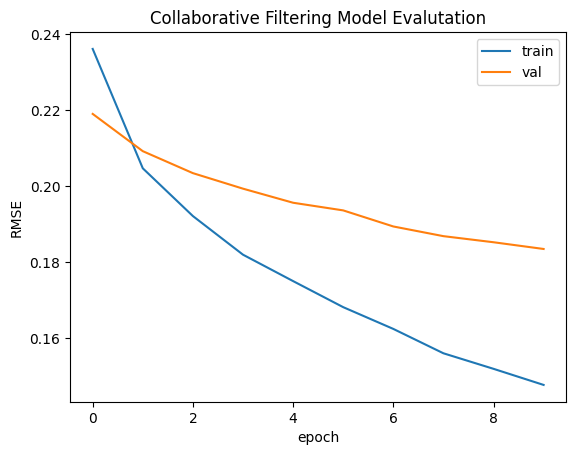

In [67]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('Collaborative Filtering Model Evalutation')
plt.ylabel('RMSE')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

Berdasarkan hasil evaluasi di atas, model dengan metode *collaborative filtering* menunjukkan performa yang baik. Hal ini terlihat dari nilai RMSE yang terus menurun secara signifikan di setiap *epoch*, hingga mencapai nilai yang cukup rendah pada *epoch* ke-30. Artinya, model mampu belajar dengan baik dan menghasilkan prediksi yang akurat. Berikut adalah metrik yang diperoleh:

- loss: 0.5592
- root_mean_squared_error: 0.1089
- val_loss: 0.6054
- val_root_mean_squared_error: 0.1752

